In [13]:


# Load the data
df = pd.read_csv("HUD_PIP_Data.csv")

# Drop rows with missing values in 'Overall Homeless' column
df = df.dropna(subset=['Overall Homeless'])

# Convert 'Overall Homeless' column to numeric, coerce errors to NaN
df['Overall Homeless'] = pd.to_numeric(df['Overall Homeless'], errors='coerce')

# Drop rows with NaN values in 'Overall Homeless' column
df = df.dropna(subset=['Overall Homeless'])

# Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter data for the years 2013 to 2023
df_filtered = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]

# Convert 'Year' column to integer type using .loc
df_filtered.loc[:, 'Year'] = df_filtered['Year'].astype(int)

# Calculate the total homeless count for each year
total_homeless_yearly = df_filtered.groupby('Year')['Overall Homeless'].sum()

# Calculate the total homeless count for each state in each year
total_homeless_state_yearly = df_filtered.groupby(['Year', 'State'])['Overall Homeless'].sum()

# Print all states
pd.set_option('display.max_rows', None)
print(total_homeless_state_yearly)


Year  State
2013  AK         1946.0
      AL         4689.0
      AR         3812.0
      AZ        10562.0
      CA       118552.0
      CO         9754.0
      CT         4448.0
      DC         6865.0
      DE          946.0
      FL        47862.0
      GA        16971.0
      GU         1271.0
      HI         6335.0
      IA         3084.0
      ID         1781.0
      IL        13425.0
      IN         6096.0
      KS         2693.0
      KY         5245.0
      LA         5226.0
      MA        19029.0
      MD         8205.0
      ME         3016.0
      MI        11527.0
      MN         8214.0
      MO         8581.0
      MS         2403.0
      MT         1878.0
      NC        12168.0
      ND         2069.0
      NE         3145.0
      NH         1447.0
      NJ        12002.0
      NM         2819.0
      NV         7039.0
      NY        77430.0
      OH        12325.0
      OK         4408.0
      OR        13822.0
      PA        15086.0
      PR         4128.0
    

In [1]:

# Assuming df contains the DataFrame with the homelessness data

# Overall Homeless Counts by Year
yearly_summary_stats = df.groupby('Year')['Overall Homeless'].agg(['mean', 'median', 'std', 'min', 'max'])

# Overall Homeless Counts by State
state_summary_stats = df.groupby('State')['Overall Homeless'].agg(['mean', 'median', 'std', 'min', 'max'])

# Print the summary statistics
print("Summary Statistics for Overall Homeless Counts by Year:")
print(yearly_summary_stats)

print("\nSummary Statistics for Overall Homeless Counts by State:")
print(state_summary_stats)

# Calculate summary statistics excluding the 'Total' row
state_stats_excluding_total = state_stats[state_stats.index != 'Total']

# Print summary statistics
print("Summary Statistics for Overall Homeless Counts by State:")
print(state_stats_excluding_total)


NameError: name 'df' is not defined

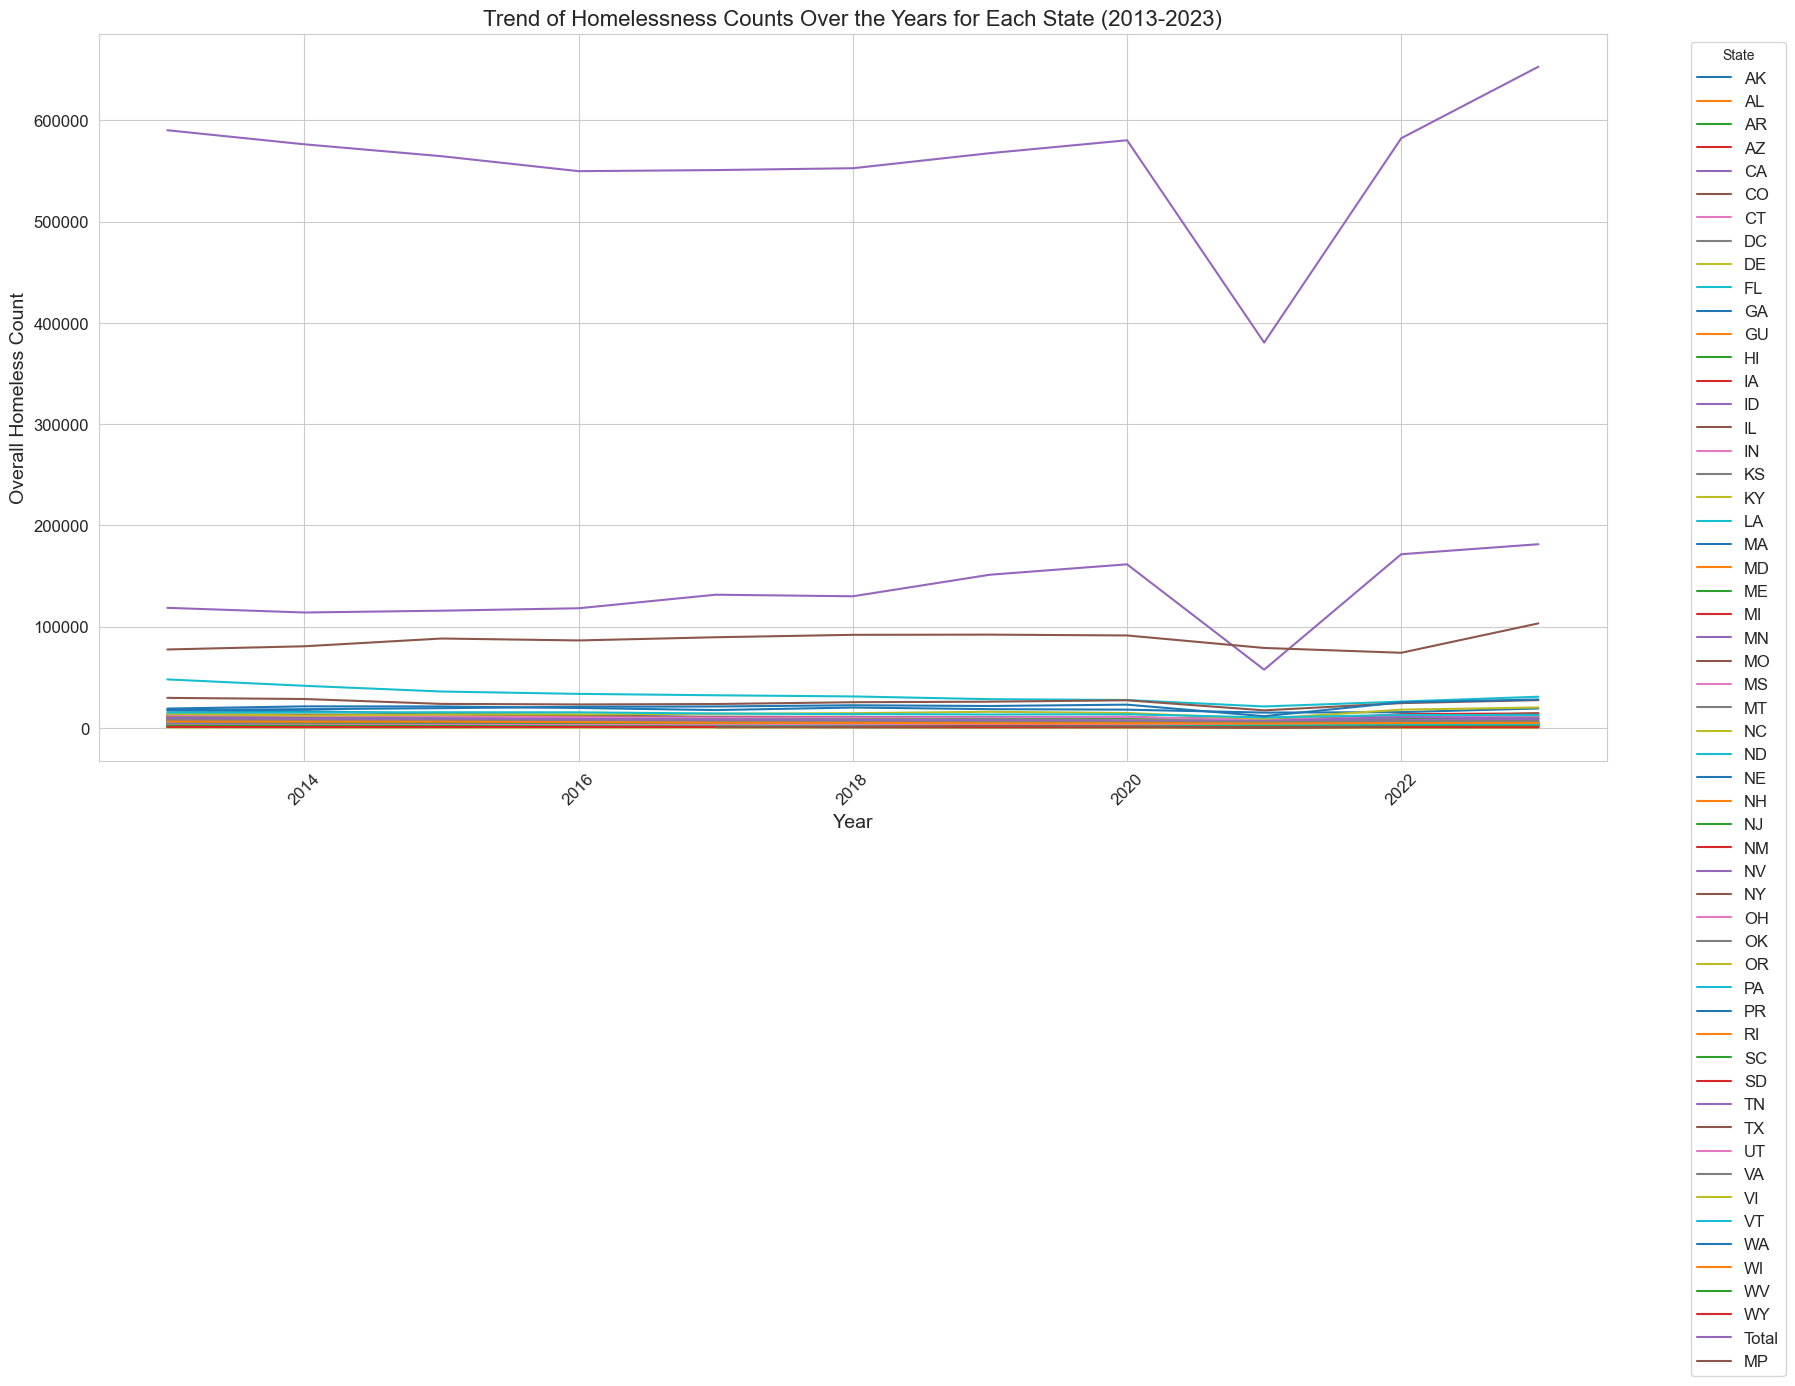

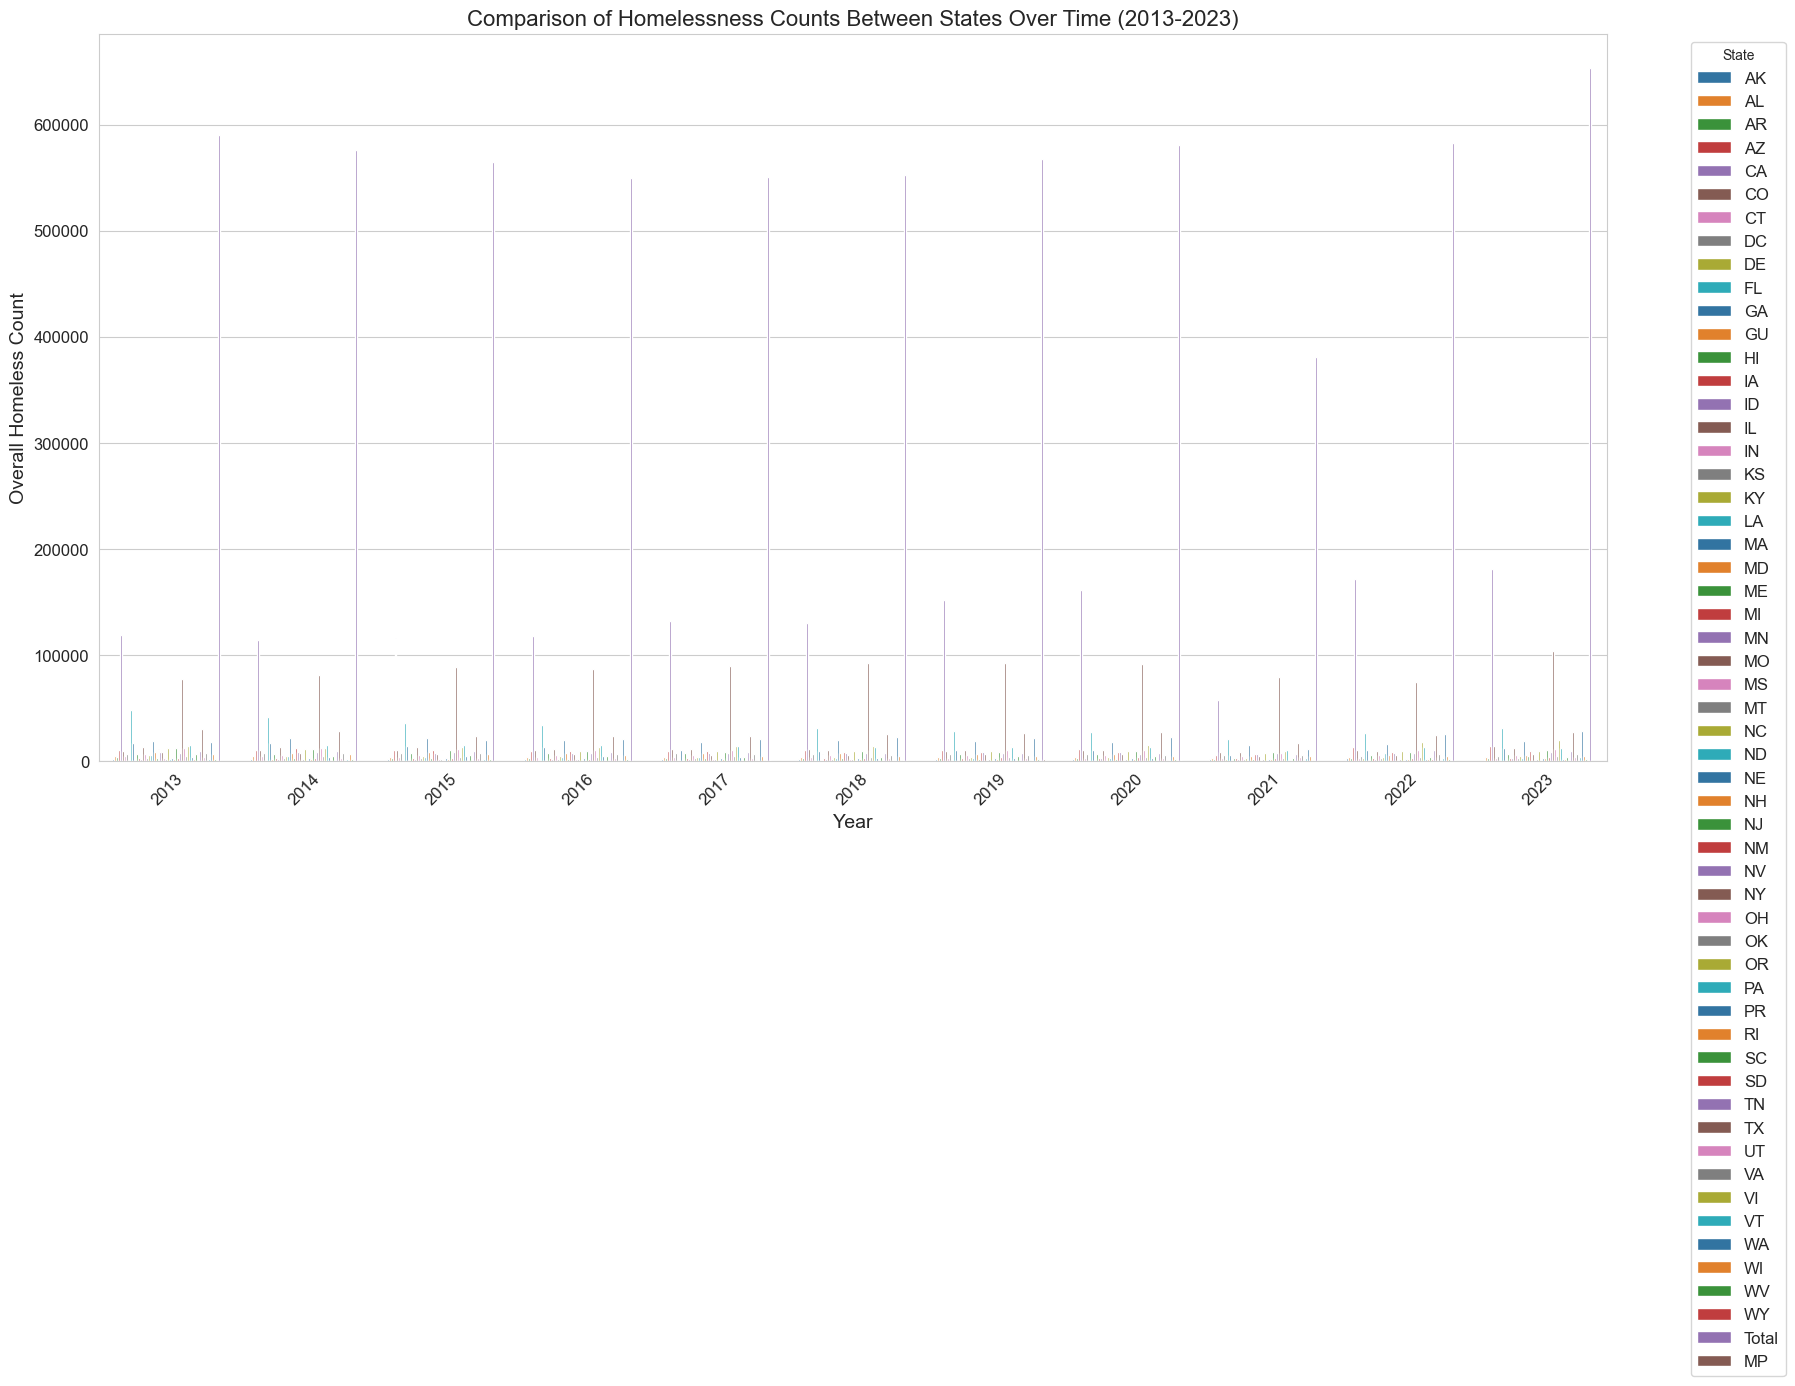

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to include only the years from 2013 to 2023
df_filtered = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]

# Set the style for seaborn
sns.set_style("whitegrid")

# Line plot to visualize the trend of homelessness counts over the years for each state
plt.figure(figsize=(18, 12))  # Increased figure size
sns.lineplot(data=df_filtered, x='Year', y='Overall Homeless', hue='State', palette='tab10')
plt.title('Trend of Homelessness Counts Over the Years for Each State (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Overall Homeless Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()  # Apply tight layout
plt.show()

# Bar chart to compare homelessness counts between states or to show changes over time
plt.figure(figsize=(18, 12))  # Increased figure size
sns.barplot(data=df_filtered, x='Year', y='Overall Homeless', hue='State', palette='tab10')
plt.title('Comparison of Homelessness Counts Between States Over Time (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Overall Homeless Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()  # Apply tight layout
plt.show()


Yearly Summary Statistics:
              mean  median           std     min       max
Year                                                      
2013  17586.454545  6335.0  33908.219170  2069.0  118552.0
2014  17241.272727  6918.0  32621.060789  1258.0  113952.0
2015       17322.0  7620.0  33178.980153  1305.0  115738.0
2016  17203.909091  7921.0  33943.644732   923.0  118142.0
2017  18018.363636  7220.0  37993.352196  1089.0  131532.0
2018  18028.636364  6530.0  37573.210585   542.0  129972.0
2019  19700.636364  6412.0  43958.433032   557.0  151278.0
2020  20774.727273  6458.0  46982.833561   541.0  161548.0
2021   9692.363636  3565.0  16414.676965   548.0   57468.0
2022  21950.272727  7373.0  49847.345199   610.0  171521.0
2023  23622.727273  6223.0  52693.661196   784.0  181399.0

State Summary Statistics:
                mean    median           std      min       max
State                                                          
AZ      10337.090909   10007.0   2295.227721   5460

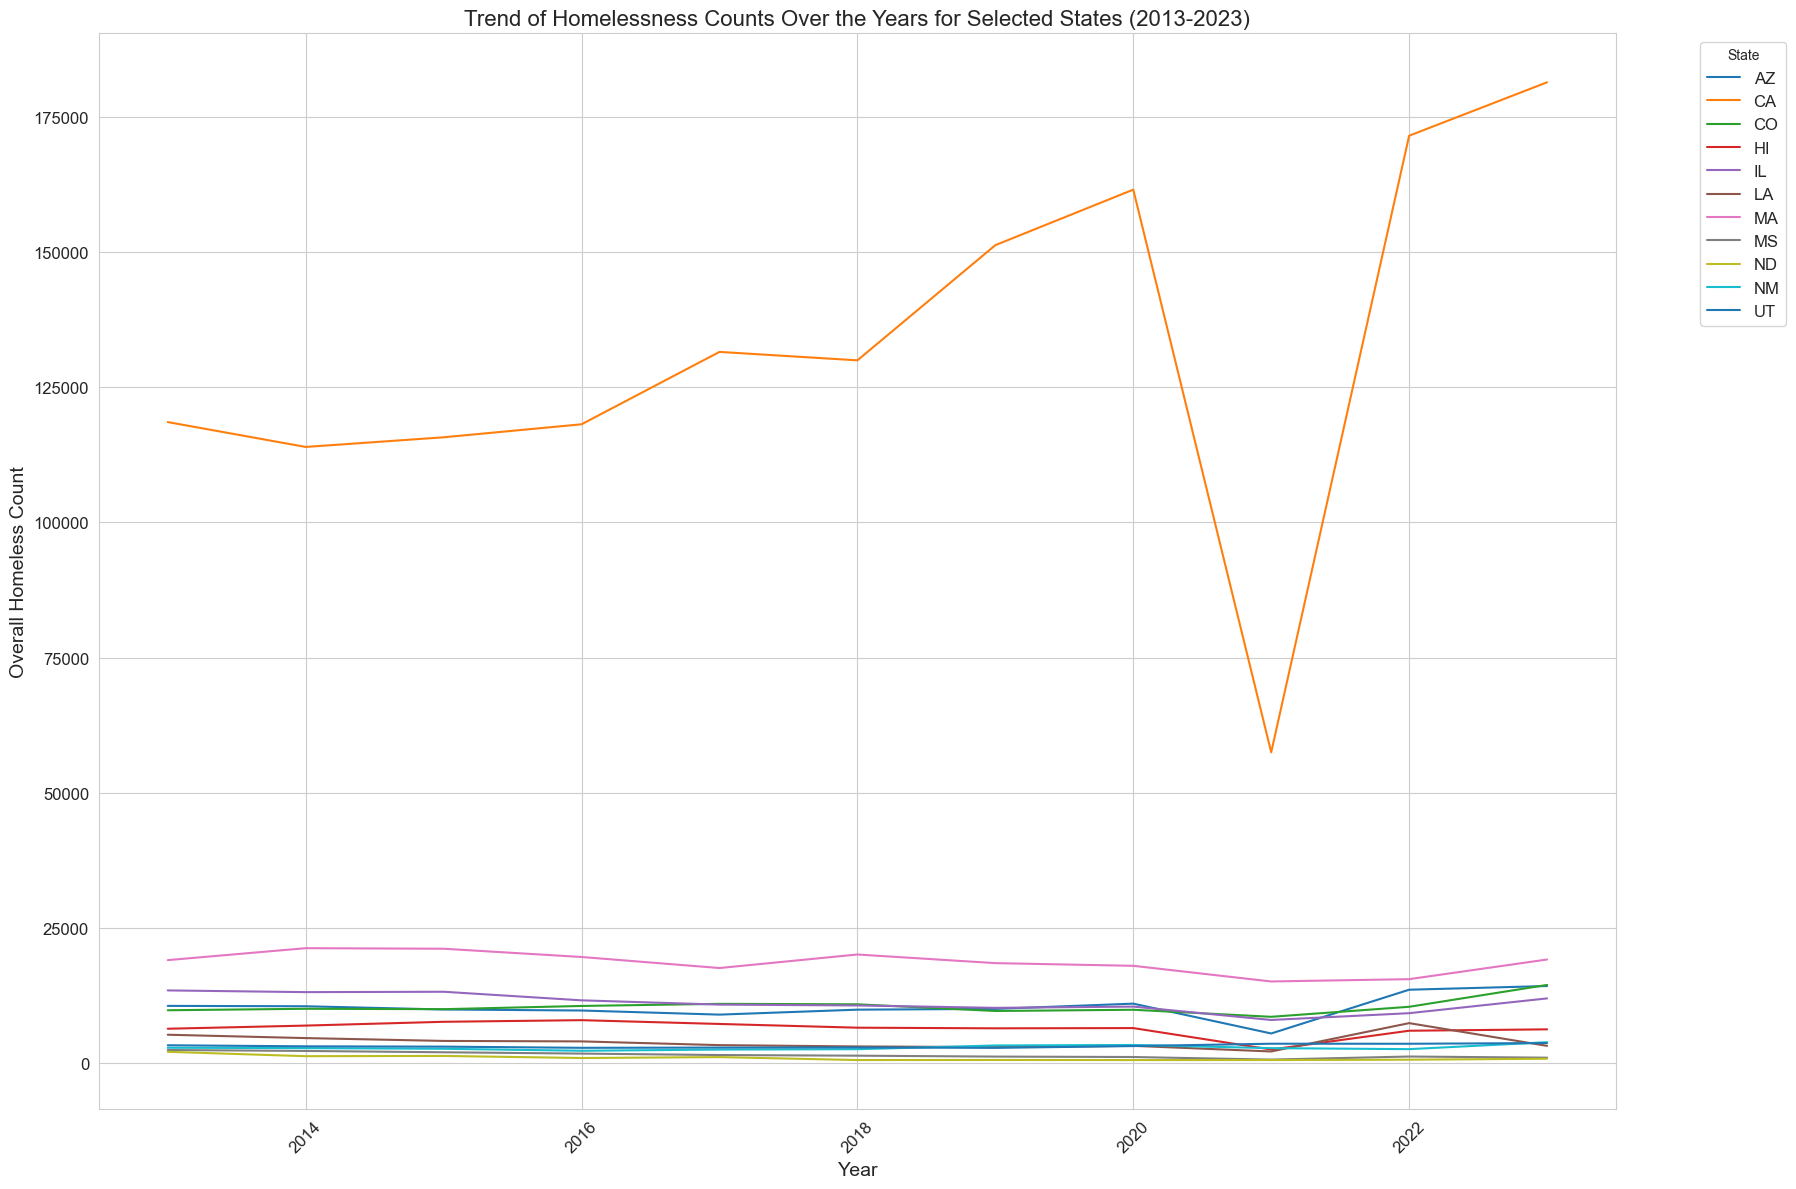

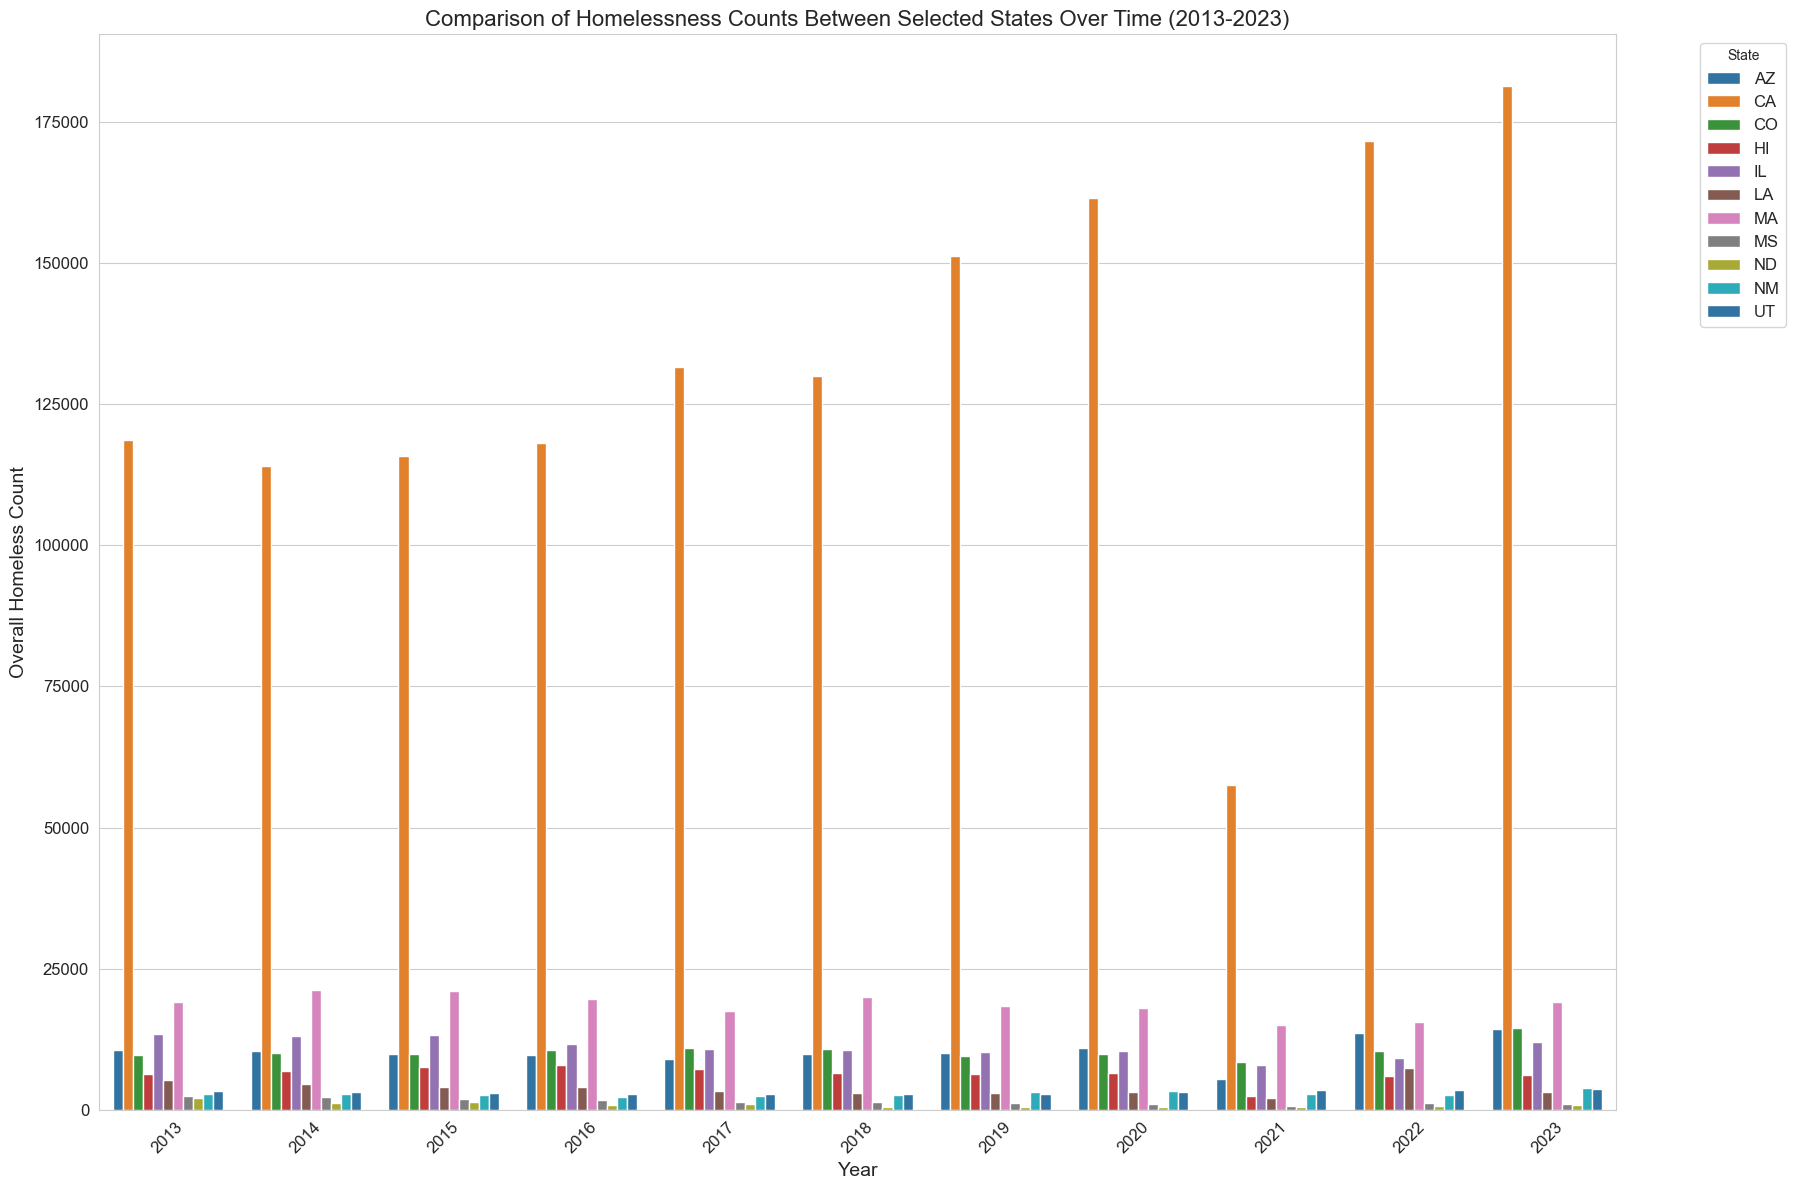

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv("HUD_PIP_Data.csv")

# Define the list of selected states
selected_states = ['HI', 'UT', 'CO', 'MA', 'CA', 'LA', 'ND', 'MS', 'IL', 'NM', 'AZ']

# Filter the data to include only the specified states and the years from 2013 to 2023
df_filtered = df[(df['Year'] >= 2013) & (df['Year'] <= 2023) & (df['State'].isin(selected_states))]

# Convert 'Overall Homeless' column to numeric using .loc to avoid SettingWithCopyWarning
df_filtered.loc[:, 'Overall Homeless'] = pd.to_numeric(df_filtered['Overall Homeless'], errors='coerce')

# Drop rows with NaN values in 'Overall Homeless' column
df_filtered = df_filtered.dropna(subset=['Overall Homeless'])

# Calculate summary statistics
yearly_stats = df_filtered.groupby('Year')['Overall Homeless'].agg(['mean', 'median', 'std', 'min', 'max'])
state_stats = df_filtered.groupby('State')['Overall Homeless'].agg(['mean', 'median', 'std', 'min', 'max'])

# Print summary statistics
print("Yearly Summary Statistics:")
print(yearly_stats)
print("\nState Summary Statistics:")
print(state_stats)

# Set the style for seaborn
sns.set_style("whitegrid")

# Line plot to visualize the trend of homelessness counts over the years for each state
plt.figure(figsize=(18, 12))
sns.lineplot(data=df_filtered, x='Year', y='Overall Homeless', hue='State', palette='tab10')
plt.title('Trend of Homelessness Counts Over the Years for Selected States (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Overall Homeless Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

# Bar chart to compare homelessness counts between states over time
plt.figure(figsize=(18, 12))
sns.barplot(data=df_filtered, x='Year', y='Overall Homeless', hue='State', palette='tab10')
plt.title('Comparison of Homelessness Counts Between Selected States Over Time (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Overall Homeless Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()
